# Data science project with nlp analysis of text from W.E.B. Du Bois' The Souls of Black Folk

# IMPORT LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
#python's lxml library parses xml and html files
from lxml import html
#python requests library gets data from web pages
import requests
from functools import reduce
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [29]:
#chapter titles
page = requests.get('https://www.gutenberg.org/files/408/408-h/408-h.htm')
mytree = html.fromstring(page.content)
titles = mytree.xpath('body/table/tr/td/a/text()')
titles

['The Forethought',
 'Of Our Spiritual Strivings',
 'Of the Dawn of Freedom',
 'Of Mr. Booker T. Washington and Others',
 'Of the Meaning of Progress',
 'Of the Wings of Atalanta',
 'Of the Training of Black Men',
 'Of the Black Belt',
 'Of the Quest of the Golden Fleece',
 'Of the Sons of Master and Man',
 'Of the Faith of the Fathers',
 'Of the Passing of the First-Born',
 'Of Alexander Crummell',
 'Of the Coming of John',
 'Of the Sorrow Songs',
 'The Afterthought']

In [32]:
#chapter 1
page = requests.get('https://www.gutenberg.org/files/408/408-h/408-h.htm')
mytree = html.fromstring(page.content)
c1 = mytree.xpath('body/div[@class="chapter"]/h3/*')
c1

[<Element a at 0x25a1722c5e0>,
 <Element a at 0x25a1722c630>,
 <Element br at 0x25a17219c70>,
 <Element a at 0x25a17219680>,
 <Element br at 0x25a17219810>,
 <Element a at 0x25a17239310>,
 <Element br at 0x25a172397c0>,
 <Element a at 0x25a18258ea0>,
 <Element br at 0x25a18258f40>,
 <Element a at 0x25a18258040>,
 <Element br at 0x25a17226c20>,
 <Element a at 0x25a17226b30>,
 <Element br at 0x25a172263b0>,
 <Element a at 0x25a172268b0>,
 <Element br at 0x25a17226860>,
 <Element a at 0x25a1825f220>,
 <Element br at 0x25a1825f400>,
 <Element a at 0x25a1825f3b0>,
 <Element br at 0x25a1825f360>,
 <Element a at 0x25a1825f310>,
 <Element br at 0x25a1825f2c0>,
 <Element a at 0x25a1825f270>,
 <Element br at 0x25a1825f630>,
 <Element a at 0x25a1825f180>,
 <Element br at 0x25a1825f090>,
 <Element a at 0x25a1825f680>,
 <Element br at 0x25a1825f5e0>,
 <Element a at 0x25a1825f590>,
 <Element br at 0x25a1825f450>,
 <Element a at 0x25a1825f4f0>]

In [2]:
#download text from W.E.B. Du Bois' The Souls of Black Folk
page = requests.get('https://www.gutenberg.org/files/408/408-h/408-h.htm')
mytree = html.fromstring(page.content)
sobf1 = mytree.xpath('body/div[@class="chapter"]/p/text()')
sobf1

['\r\nHerein lie buried many things which if read with patience may show the strange\r\nmeaning of being black here at the dawning of the Twentieth Century. This\r\nmeaning is not without interest to you, Gentle Reader; for the problem of the\r\nTwentieth Century is the problem of the color line.\r\n',
 '\r\nI pray you, then, receive my little book in all charity, studying my words with\r\nme, forgiving mistake and foible for sake of the faith and passion that is in\r\nme, and seeking the grain of truth hidden there.\r\n',
 '\r\nI have sought here to sketch, in vague, uncertain outline, the spiritual world\r\nin which ten thousand thousand Americans live and strive. First, in two\r\nchapters I have tried to show what Emancipation meant to them, and what was its\r\naftermath. In a third chapter I have pointed out the slow rise of personal\r\nleadership, and criticized candidly the leader who bears the chief burden of\r\nhis race to-day. Then, in two other chapters I have sketched in swi

In [3]:
#use list comprehension to remove extra text in list
sobf1=[a.replace("\r\n"," ") for a in sobf1]
sobf1=[b.replace("Mr.","Mr") for b in sobf1]
sobf1=[c.replace("Mrs.","Mrs") for c in sobf1]
sobf1=[d.replace("MRS.","MRS") for d in sobf1]
sobf1=[e.replace("MR.","MR") for e in sobf1]
sobf1=[g.strip() for g in sobf1]
sobf1

['Herein lie buried many things which if read with patience may show the strange meaning of being black here at the dawning of the Twentieth Century. This meaning is not without interest to you, Gentle Reader; for the problem of the Twentieth Century is the problem of the color line.',
 'I pray you, then, receive my little book in all charity, studying my words with me, forgiving mistake and foible for sake of the faith and passion that is in me, and seeking the grain of truth hidden there.',
 'I have sought here to sketch, in vague, uncertain outline, the spiritual world in which ten thousand thousand Americans live and strive. First, in two chapters I have tried to show what Emancipation meant to them, and what was its aftermath. In a third chapter I have pointed out the slow rise of personal leadership, and criticized candidly the leader who bears the chief burden of his race to-day. Then, in two other chapters I have sketched in swift outline the two worlds within and without the V

In [4]:
#make each sentence an element in list
sobf1=[re.split(r'\. |\? |\! |\" |\.|\?|\!',h) for h in sobf1]
sobf = []
for inner_list in sobf1:
    for ele in inner_list:
        sobf.append(ele)

sobf

['Herein lie buried many things which if read with patience may show the strange meaning of being black here at the dawning of the Twentieth Century',
 'This meaning is not without interest to you, Gentle Reader; for the problem of the Twentieth Century is the problem of the color line',
 '',
 'I pray you, then, receive my little book in all charity, studying my words with me, forgiving mistake and foible for sake of the faith and passion that is in me, and seeking the grain of truth hidden there',
 '',
 'I have sought here to sketch, in vague, uncertain outline, the spiritual world in which ten thousand thousand Americans live and strive',
 'First, in two chapters I have tried to show what Emancipation meant to them, and what was its aftermath',
 'In a third chapter I have pointed out the slow rise of personal leadership, and criticized candidly the leader who bears the chief burden of his race to-day',
 'Then, in two other chapters I have sketched in swift outline the two worlds with

In [5]:
#get number of elements or sentences in list
len(sobf)

3305

In [6]:
#turn list into a dictionary and into a dataframe
listdict={"text":sobf}
data=pd.DataFrame(listdict)

In [7]:
data.info

<bound method DataFrame.info of                                                    text
0     Herein lie buried many things which if read wi...
1     This meaning is not without interest to you, G...
2                                                      
3     I pray you, then, receive my little book in al...
4                                                      
...                                                 ...
3300  Let there spring, Gentle One, from out its lea...
3301  Let the ears of a guilty people tingle with tr...
3302  Thus in Thy good time may infinite reason turn...
3303                                                   
3304                                                   

[3305 rows x 1 columns]>

In [8]:
# Let's get the length of the sentences in the text
data['length']=data['text'].apply(len)
data

text  length
0     Herein lie buried many things which if read wi...     146
1     This meaning is not without interest to you, G...     133
2                                                             0
3     I pray you, then, receive my little book in al...     205
4                                                             0
...                                                 ...     ...
3300  Let there spring, Gentle One, from out its lea...     116
3301  Let the ears of a guilty people tingle with tr...     186
3302  Thus in Thy good time may infinite reason turn...     123
3303                                                          0
3304                                                          0

[3305 rows x 2 columns]

In [9]:
#look at rows with length less than or equal to 3
data[data['length']<=3].value_counts()

text  length
      0         414
”     1          63
1     1           3
2     1           3
3     1           3
E     1           2
W     1           2
Yes   3           2
B     1           1
No    2           1
and   3           1
“     1           1
” “   3           1
dtype: int64

In [10]:
#drop rows with low lengths
data=data[data['length']>3]
data

text  length
0     Herein lie buried many things which if read wi...     146
1     This meaning is not without interest to you, G...     133
3     I pray you, then, receive my little book in al...     205
5     I have sought here to sketch, in vague, uncert...     135
6     First, in two chapters I have tried to show wh...     103
...                                                 ...     ...
3297  And the traveller girds himself, and sets his ...      87
3299  Hear my cry, O God the Reader; vouchsafe that ...     104
3300  Let there spring, Gentle One, from out its lea...     116
3301  Let the ears of a guilty people tingle with tr...     186
3302  Thus in Thy good time may infinite reason turn...     123

[2808 rows x 2 columns]

In [11]:
data.info

<bound method DataFrame.info of                                                    text  length
0     Herein lie buried many things which if read wi...     146
1     This meaning is not without interest to you, G...     133
3     I pray you, then, receive my little book in al...     205
5     I have sought here to sketch, in vague, uncert...     135
6     First, in two chapters I have tried to show wh...     103
...                                                 ...     ...
3297  And the traveller girds himself, and sets his ...      87
3299  Hear my cry, O God the Reader; vouchsafe that ...     104
3300  Let there spring, Gentle One, from out its lea...     116
3301  Let the ears of a guilty people tingle with tr...     186
3302  Thus in Thy good time may infinite reason turn...     123

[2808 rows x 2 columns]>

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:ylabel='Frequency'>

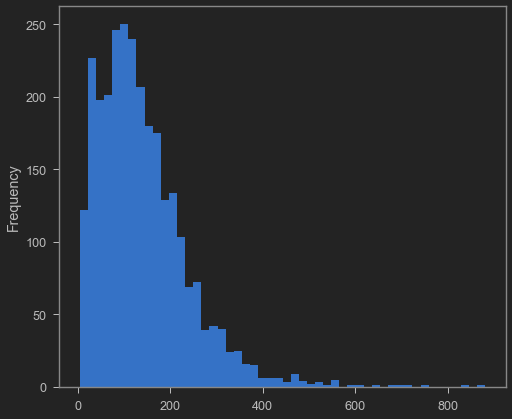

In [12]:
#histogram of length variable
data['length'].plot(bins=50, kind='hist') 

In [13]:
# create log10 of length due to right skew of length column
data['lengthlog10']=np.log10(data['length'])
data['lengthlog10'].value_counts()

c:\users\e_a_h\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


2.041393    20
2.075547    20
2.025306    19
2.222716    19
2.049218    19
            ..
2.873321     1
2.629410     1
2.565848     1
2.804821     1
2.491362     1
Name: lengthlog10, Length: 411, dtype: int64

<AxesSubplot:ylabel='Frequency'>

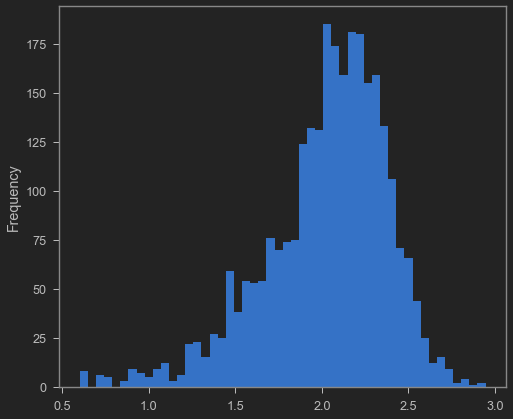

In [14]:
#histogram of logarithm bse 10 of length variable
data['lengthlog10'].plot(bins=50, kind='hist') 

In [15]:
data.describe()

length  lengthlog10
count  2808.000000  2808.000000
mean    139.238248     2.025696
std      97.322161     0.355927
min       4.000000     0.602060
25%      70.000000     1.845098
50%     121.000000     2.082785
75%     187.000000     2.271842
max     881.000000     2.944976

In [16]:
#look at longest sentence
data[data['length']==881]['text'].iloc[0]

'I will not stop here to inquire whose duty it was—whether that of the white ex-master who had profited by unpaid toil, or the Northern philanthropist whose persistence brought on the crisis, or the National Government whose edict freed the bondmen; I will not stop to ask whose duty it was, but I insist it was the duty of some one to see that these workingmen were not left alone and unguided, without capital, without land, without skill, without economic organization, without even the bald protection of law, order, and decency,—left in a great land, not to settle down to slow and careful internal development, but destined to be thrown almost immediately into relentless and sharp competition with the best of modern workingmen under an economic system where every participant is fighting for himself, and too often utterly regardless of the rights or welfare of his neighbor'

# PLOT WORD CLOUD

In [17]:
#put text column into a single list
sentences=data['text'].tolist()
sentences

['Herein lie buried many things which if read with patience may show the strange meaning of being black here at the dawning of the Twentieth Century',
 'This meaning is not without interest to you, Gentle Reader; for the problem of the Twentieth Century is the problem of the color line',
 'I pray you, then, receive my little book in all charity, studying my words with me, forgiving mistake and foible for sake of the faith and passion that is in me, and seeking the grain of truth hidden there',
 'I have sought here to sketch, in vague, uncertain outline, the spiritual world in which ten thousand thousand Americans live and strive',
 'First, in two chapters I have tried to show what Emancipation meant to them, and what was its aftermath',
 'In a third chapter I have pointed out the slow rise of personal leadership, and criticized candidly the leader who bears the chief burden of his race to-day',
 'Then, in two other chapters I have sketched in swift outline the two worlds within and wit

In [18]:
#get length of list
len(sentences)

2808

In [19]:
#make list into a single string instead of having multiple elements
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

'Herein lie buried many things which if read with patience may show the strange meaning of being black here at the dawning of the Twentieth Century This meaning is not without interest to you, Gentle Reader; for the problem of the Twentieth Century is the problem of the color line I pray you, then, receive my little book in all charity, studying my words with me, forgiving mistake and foible for sake of the faith and passion that is in me, and seeking the grain of truth hidden there I have sought here to sketch, in vague, uncertain outline, the spiritual world in which ten thousand thousand Americans live and strive First, in two chapters I have tried to show what Emancipation meant to them, and what was its aftermath In a third chapter I have pointed out the slow rise of personal leadership, and criticized candidly the leader who bears the chief burden of his race to-day Then, in two other chapters I have sketched in swift outline the two worlds within and without the Veil, and thus h

In [20]:
#get number of characters and spaces in single string
len(sentences_as_one_string)

393788

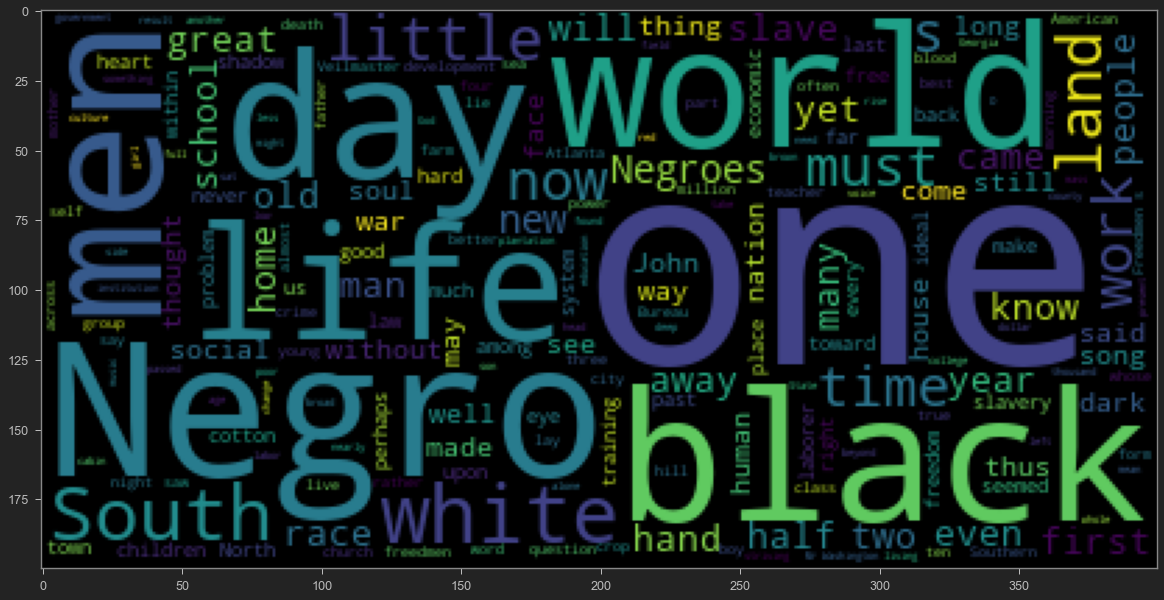

In [21]:
#plot word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [22]:
#show puntuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
#remove punctuation from text
Text_punc_removed = [char  for char in sentences_as_one_string  if char not in string.punctuation ]
Text_punc_removed

['H',
 'e',
 'r',
 'e',
 'i',
 'n',
 ' ',
 'l',
 'i',
 'e',
 ' ',
 'b',
 'u',
 'r',
 'i',
 'e',
 'd',
 ' ',
 'm',
 'a',
 'n',
 'y',
 ' ',
 't',
 'h',
 'i',
 'n',
 'g',
 's',
 ' ',
 'w',
 'h',
 'i',
 'c',
 'h',
 ' ',
 'i',
 'f',
 ' ',
 'r',
 'e',
 'a',
 'd',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'p',
 'a',
 't',
 'i',
 'e',
 'n',
 'c',
 'e',
 ' ',
 'm',
 'a',
 'y',
 ' ',
 's',
 'h',
 'o',
 'w',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 't',
 'r',
 'a',
 'n',
 'g',
 'e',
 ' ',
 'm',
 'e',
 'a',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'o',
 'f',
 ' ',
 'b',
 'e',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'l',
 'a',
 'c',
 'k',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'a',
 't',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'd',
 'a',
 'w',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'T',
 'w',
 'e',
 'n',
 't',
 'i',
 'e',
 't',
 'h',
 ' ',
 'C',
 'e',
 'n',
 't',
 'u',
 'r',
 'y',
 ' ',
 'T',
 'h',
 'i',
 's',
 ' ',
 'm',
 'e',
 'a',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'i',
 's',
 ' ',
 'n',
 'o',
 't',
 ' '

In [24]:
# Join the characters again to form the string.
Text_punc_removed_join = ''.join(Text_punc_removed)
Text_punc_removed_join

'Herein lie buried many things which if read with patience may show the strange meaning of being black here at the dawning of the Twentieth Century This meaning is not without interest to you Gentle Reader for the problem of the Twentieth Century is the problem of the color line I pray you then receive my little book in all charity studying my words with me forgiving mistake and foible for sake of the faith and passion that is in me and seeking the grain of truth hidden there I have sought here to sketch in vague uncertain outline the spiritual world in which ten thousand thousand Americans live and strive First in two chapters I have tried to show what Emancipation meant to them and what was its aftermath In a third chapter I have pointed out the slow rise of personal leadership and criticized candidly the leader who bears the chief burden of his race today Then in two other chapters I have sketched in swift outline the two worlds within and without the Veil and thus have come to the 

# REMOVE STOPWORDS

In [25]:
#download stopwords
nltk.download('stopwords')
#show stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\E_A_H\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
#remove stopwords from text
Text_punc_removed_join_clean = [word for word in Text_punc_removed_join.split() if word.lower() 
                                not in stopwords.words('english')]
Text_punc_removed_join_clean

['Herein',
 'lie',
 'buried',
 'many',
 'things',
 'read',
 'patience',
 'may',
 'show',
 'strange',
 'meaning',
 'black',
 'dawning',
 'Twentieth',
 'Century',
 'meaning',
 'without',
 'interest',
 'Gentle',
 'Reader',
 'problem',
 'Twentieth',
 'Century',
 'problem',
 'color',
 'line',
 'pray',
 'receive',
 'little',
 'book',
 'charity',
 'studying',
 'words',
 'forgiving',
 'mistake',
 'foible',
 'sake',
 'faith',
 'passion',
 'seeking',
 'grain',
 'truth',
 'hidden',
 'sought',
 'sketch',
 'vague',
 'uncertain',
 'outline',
 'spiritual',
 'world',
 'ten',
 'thousand',
 'thousand',
 'Americans',
 'live',
 'strive',
 'First',
 'two',
 'chapters',
 'tried',
 'show',
 'Emancipation',
 'meant',
 'aftermath',
 'third',
 'chapter',
 'pointed',
 'slow',
 'rise',
 'personal',
 'leadership',
 'criticized',
 'candidly',
 'leader',
 'bears',
 'chief',
 'burden',
 'race',
 'today',
 'two',
 'chapters',
 'sketched',
 'swift',
 'outline',
 'two',
 'worlds',
 'within',
 'without',
 'Veil',
 'thus'

# PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [27]:
#create vectorizer
vectorizer = CountVectorizer()
#apply to text
X = vectorizer.fit_transform(Text_punc_removed_join_clean)

In [28]:
#print feature names
print(vectorizer.get_feature_names())

['100', '12', '143', '15th', '16', '1750', '1790', '1800', '1808', '1810', '1814', '1820', '1822', '1830', '1831', '1837', '1842', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1874', '1875', '1876', '1880', '1884', '1885', '1890', '1893', '1895', '1896', '1898', '19', '1900', '1903', '22', '28', '29', '413', '43', '500', '53', '63', '68', 'abandon', 'abandoned', 'abandonment', 'abatement', 'abdomen', 'aber', 'abet', 'abide', 'ability', 'ablaze', 'able', 'ablebodied', 'abolished', 'abolition', 'abolitionist', 'abolitionists', 'abominations', 'abortion', 'abortions', 'abound', 'above', 'abreaking', 'abroad', 'abrupt', 'absconding', 'absence', 'absent', 'absentee', 'absolutely', 'absurdities', 'abundance', 'abuse', 'academic', 'academies', 'academus', 'academy', 'accept', 'acceptable', 'accepts', 'accident', 'accidents', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishment',

In [29]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
X.shape

(35870, 8671)

# ANOTHER WAY TO TOKENIZE AND REMOVE STOPWORDS

In [31]:
#use word_tokenize function to tokenize text 
tokenized_word = word_tokenize(Text_punc_removed_join)
#print tokenized version of text
print(tokenized_word)

['Herein', 'lie', 'buried', 'many', 'things', 'which', 'if', 'read', 'with', 'patience', 'may', 'show', 'the', 'strange', 'meaning', 'of', 'being', 'black', 'here', 'at', 'the', 'dawning', 'of', 'the', 'Twentieth', 'Century', 'This', 'meaning', 'is', 'not', 'without', 'interest', 'to', 'you', 'Gentle', 'Reader', 'for', 'the', 'problem', 'of', 'the', 'Twentieth', 'Century', 'is', 'the', 'problem', 'of', 'the', 'color', 'line', 'I', 'pray', 'you', 'then', 'receive', 'my', 'little', 'book', 'in', 'all', 'charity', 'studying', 'my', 'words', 'with', 'me', 'forgiving', 'mistake', 'and', 'foible', 'for', 'sake', 'of', 'the', 'faith', 'and', 'passion', 'that', 'is', 'in', 'me', 'and', 'seeking', 'the', 'grain', 'of', 'truth', 'hidden', 'there', 'I', 'have', 'sought', 'here', 'to', 'sketch', 'in', 'vague', 'uncertain', 'outline', 'the', 'spiritual', 'world', 'in', 'which', 'ten', 'thousand', 'thousand', 'Americans', 'live', 'and', 'strive', 'First', 'in', 'two', 'chapters', 'I', 'have', 'tried

In [32]:
#get data type
type(tokenized_word)

list

In [33]:
#get number of tokens from length of list
len(tokenized_word)

69689

In [34]:
#calculate measure of lexical richness in text (percent of total words that are unique)
#number of unique tokens/number of all tokens *100
len(set(tokenized_word))/len(tokenized_word)*100

14.111265766476775

In [36]:
#make everything in text lower case
#list comprehension where each word in tokenized_word is made into lower case
tk_low = [w.lower() for w in tokenized_word]
print(tk_low)

['herein', 'lie', 'buried', 'many', 'things', 'which', 'if', 'read', 'with', 'patience', 'may', 'show', 'the', 'strange', 'meaning', 'of', 'being', 'black', 'here', 'at', 'the', 'dawning', 'of', 'the', 'twentieth', 'century', 'this', 'meaning', 'is', 'not', 'without', 'interest', 'to', 'you', 'gentle', 'reader', 'for', 'the', 'problem', 'of', 'the', 'twentieth', 'century', 'is', 'the', 'problem', 'of', 'the', 'color', 'line', 'i', 'pray', 'you', 'then', 'receive', 'my', 'little', 'book', 'in', 'all', 'charity', 'studying', 'my', 'words', 'with', 'me', 'forgiving', 'mistake', 'and', 'foible', 'for', 'sake', 'of', 'the', 'faith', 'and', 'passion', 'that', 'is', 'in', 'me', 'and', 'seeking', 'the', 'grain', 'of', 'truth', 'hidden', 'there', 'i', 'have', 'sought', 'here', 'to', 'sketch', 'in', 'vague', 'uncertain', 'outline', 'the', 'spiritual', 'world', 'in', 'which', 'ten', 'thousand', 'thousand', 'americans', 'live', 'and', 'strive', 'first', 'in', 'two', 'chapters', 'i', 'have', 'tried

In [37]:
#create list of English stopwords
stop_words = set(stopwords.words('english'))
#print list
print(stop_words)

{"should've", 'here', "aren't", 'who', 'because', 'now', "you'd", 'was', 'during', 'are', 'not', 'an', 'or', 'aren', "weren't", "shouldn't", "isn't", 'those', 'that', 'then', 'needn', 'won', 'so', 'she', 'myself', 'doesn', 'further', "it's", "wouldn't", 'these', 'will', 'll', 'on', 'while', 'weren', 'is', 'when', 'above', 'he', 'in', 'what', 'than', 'shan', 'they', 'through', 'their', 'it', 'haven', 'me', 'have', 'himself', 'to', "shan't", 'wasn', 'up', 'under', 'same', "won't", 'there', 'for', 'isn', 'being', 'where', 'ma', 'yourselves', 'be', 'am', 'themselves', "haven't", 'nor', 'you', 'the', 'his', 'your', 'each', 'other', 'if', "wasn't", 'no', "doesn't", 'until', 'had', 'about', 'hers', 'both', 'between', 'ourselves', 'whom', 'them', 's', 'very', 'didn', 'been', 'once', 'herself', 'below', "mightn't", 'itself', 'into', 'from', 'few', 'did', 'after', 'has', 'only', 'y', 'a', "she's", "that'll", 'at', "hadn't", 'out', 'we', 'before', 'don', 'yourself', "don't", 'couldn', 'does', 'th

In [38]:
#remove stop words from text
#create empty string
filtered_text = []
#for loop going over tk_low_np
for w in tk_low:
    #add words to empty list if they aren't in stop words list
   if w not in stop_words:    
      filtered_text.append(w)
print(filtered_text)

['herein', 'lie', 'buried', 'many', 'things', 'read', 'patience', 'may', 'show', 'strange', 'meaning', 'black', 'dawning', 'twentieth', 'century', 'meaning', 'without', 'interest', 'gentle', 'reader', 'problem', 'twentieth', 'century', 'problem', 'color', 'line', 'pray', 'receive', 'little', 'book', 'charity', 'studying', 'words', 'forgiving', 'mistake', 'foible', 'sake', 'faith', 'passion', 'seeking', 'grain', 'truth', 'hidden', 'sought', 'sketch', 'vague', 'uncertain', 'outline', 'spiritual', 'world', 'ten', 'thousand', 'thousand', 'americans', 'live', 'strive', 'first', 'two', 'chapters', 'tried', 'show', 'emancipation', 'meant', 'aftermath', 'third', 'chapter', 'pointed', 'slow', 'rise', 'personal', 'leadership', 'criticized', 'candidly', 'leader', 'bears', 'chief', 'burden', 'race', 'today', 'two', 'chapters', 'sketched', 'swift', 'outline', 'two', 'worlds', 'within', 'without', 'veil', 'thus', 'come', 'central', 'problem', 'training', 'men', 'life', 'venturing', 'deeper', 'detail

# VISUALIZE FREQUENCY DISTRIBUTION OF WORDS

In [41]:
# put filtered text into a data frame
new_dict={'text':filtered_text}
data1=pd.DataFrame(new_dict)

In [43]:
#clean data
data1['length']=data1['text'].apply(len)
data1[data1['length']<=3].value_counts()

text  length
’     1         356
“     1         345
”     1         281
one   3         215
men   3         198
               ... 
ash   3           1
pat   3           1
hay   3           1
ox    2           1
awe   3           1
Length: 237, dtype: int64

In [44]:
#drop rows with low lengths
data1=data1[data1['length']>3]
data1

text  length
0       herein       6
2       buried       6
3         many       4
4       things       6
5         read       4
...        ...     ...
36533  crooked       7
36534    marks       5
36535  fragile       7
36536     leaf       4
36537   indeed       6

[32922 rows x 2 columns]

In [45]:
#put text back into list
new_ftext=data1['text'].tolist()
new_ftext

['herein',
 'buried',
 'many',
 'things',
 'read',
 'patience',
 'show',
 'strange',
 'meaning',
 'black',
 'dawning',
 'twentieth',
 'century',
 'meaning',
 'without',
 'interest',
 'gentle',
 'reader',
 'problem',
 'twentieth',
 'century',
 'problem',
 'color',
 'line',
 'pray',
 'receive',
 'little',
 'book',
 'charity',
 'studying',
 'words',
 'forgiving',
 'mistake',
 'foible',
 'sake',
 'faith',
 'passion',
 'seeking',
 'grain',
 'truth',
 'hidden',
 'sought',
 'sketch',
 'vague',
 'uncertain',
 'outline',
 'spiritual',
 'world',
 'thousand',
 'thousand',
 'americans',
 'live',
 'strive',
 'first',
 'chapters',
 'tried',
 'show',
 'emancipation',
 'meant',
 'aftermath',
 'third',
 'chapter',
 'pointed',
 'slow',
 'rise',
 'personal',
 'leadership',
 'criticized',
 'candidly',
 'leader',
 'bears',
 'chief',
 'burden',
 'race',
 'today',
 'chapters',
 'sketched',
 'swift',
 'outline',
 'worlds',
 'within',
 'without',
 'veil',
 'thus',
 'come',
 'central',
 'problem',
 'training',


In [47]:
#calculate measure of lexical richness in text (percent of total words that are unique)
#number of unique tokens/number of all tokens *100
len(set(new_ftext))/len(new_ftext)*100

26.772371058866412

In [51]:
#get frequency distribution
fdist = FreqDist(new_ftext)
#50 most common words in text
fdist.most_common(50)

[('negro', 279),
 ('black', 271),
 ('world', 164),
 ('south', 161),
 ('life', 156),
 ('white', 152),
 ('little', 151),
 ('land', 129),
 ('must', 124),
 ('work', 108),
 ('negroes', 107),
 ('great', 98),
 ('even', 94),
 ('came', 86),
 ('away', 83),
 ('first', 81),
 ('people', 81),
 ('today', 80),
 ('would', 80),
 ('social', 79),
 ('many', 77),
 ('said', 77),
 ('like', 75),
 ('freedmen', 75),
 ('time', 73),
 ('without', 71),
 ('years', 71),
 ('hundred', 71),
 ('thousand', 69),
 ('still', 68),
 ('human', 66),
 ('thus', 64),
 ('know', 64),
 ('system', 63),
 ('bureau', 62),
 ('training', 60),
 ('long', 60),
 ('dark', 59),
 ('half', 58),
 ('john', 57),
 ('made', 56),
 ('nation', 56),
 ('toward', 56),
 ('slavery', 56),
 ('upon', 55),
 ('seemed', 55),
 ('thought', 55),
 ('school', 54),
 ('last', 53),
 ('among', 53)]